In [7]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import numpy as np

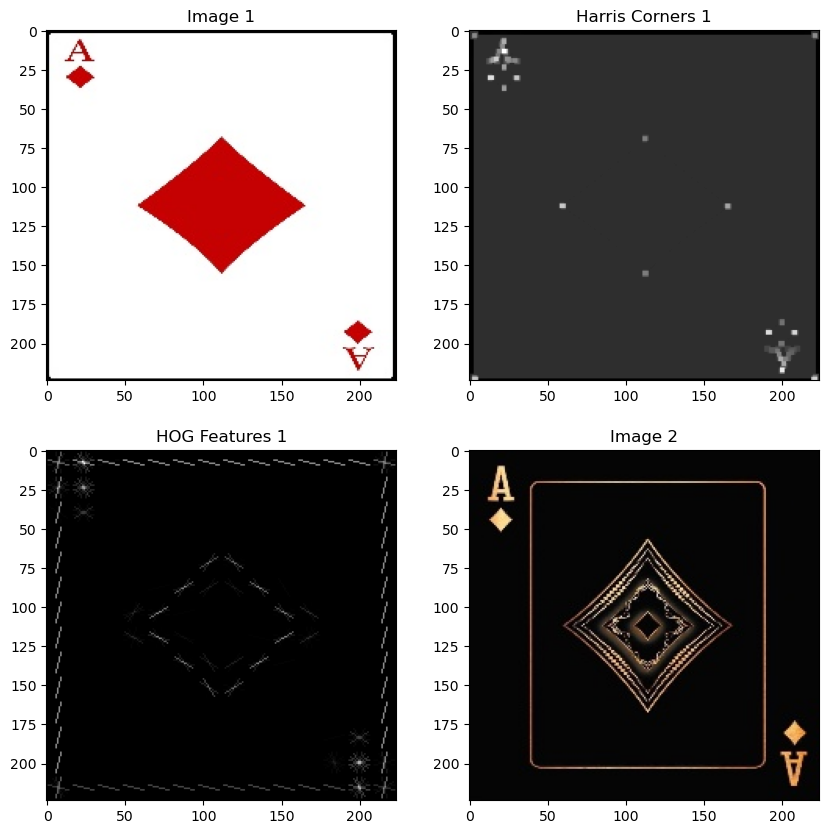

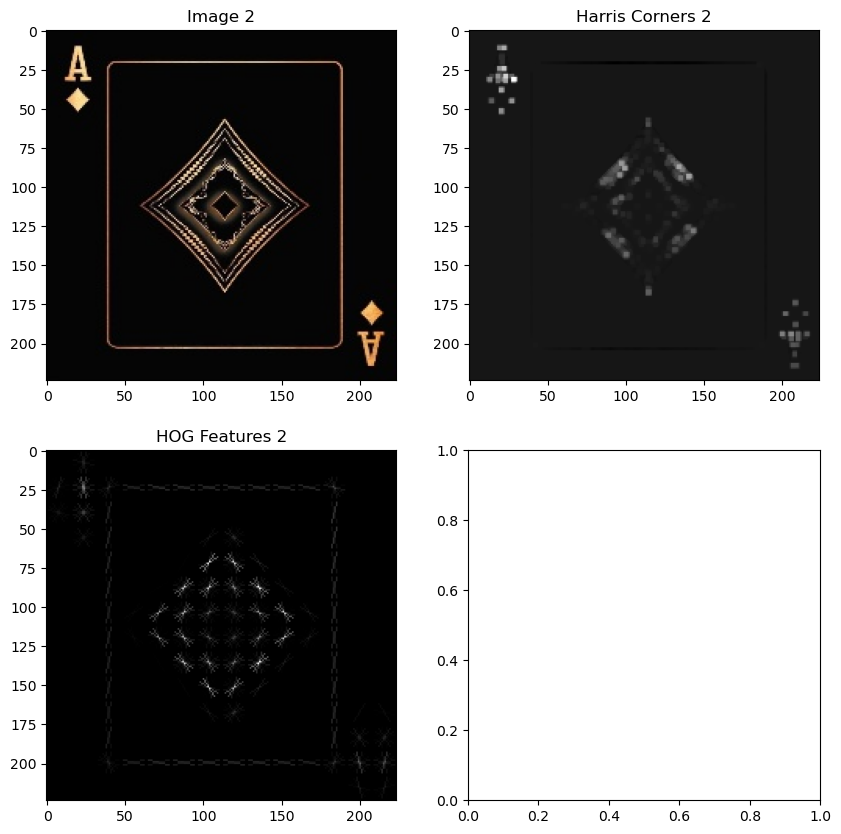

Euclidean Distance: 1136.0054614199523


In [9]:
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt

def harris_hog_descriptor(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Harris Corner Detection
    harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    harris_corners = cv2.dilate(harris_corners, None)

    # Calculate HOG features
    _, hog_image = feature.hog(gray, orientations=8, pixels_per_cell=(16, 16),
                                cells_per_block=(1, 1), visualize=True, block_norm='L2-Hys')

    return harris_corners, hog_image

def euclidean_distance(descriptor1, descriptor2):
    # Calculate the Euclidean distance
    distance = np.linalg.norm(descriptor1 - descriptor2)
    return distance

# Example usage:
image1 = cv2.imread('test/ace of diamonds/1.jpg')
image2 = cv2.imread('test/ace of diamonds/2.jpg')

harris1, hog1 = harris_hog_descriptor(image1)
harris2, hog2 = harris_hog_descriptor(image2)

# Flatten the arrays for Euclidean distance calculation
descriptor1 = np.concatenate([harris1.flatten(), hog1.flatten()])
descriptor2 = np.concatenate([harris2.flatten(), hog2.flatten()])

distance = euclidean_distance(descriptor1, descriptor2)

# Display images with Harris corners and HOG features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image 1')

axes[0, 1].imshow(harris1, cmap='gray')
axes[0, 1].set_title('Harris Corners 1')

axes[1, 0].imshow(hog1, cmap='gray')
axes[1, 0].set_title('HOG Features 1')

axes[1, 1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Image 2')

plt.show()

# Display images with Harris corners and HOG features for Image 2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image 2')

axes[0, 1].imshow(harris2, cmap='gray')
axes[0, 1].set_title('Harris Corners 2')

axes[1, 0].imshow(hog2, cmap='gray')
axes[1, 0].set_title('HOG Features 2')

plt.show()

print(f"Euclidean Distance: {distance}")



Processing images in subfolder: test/ace of clubs

Processing images in subfolder: test/ace of diamonds

Processing images in subfolder: test/ace of hearts

Processing images in subfolder: test/ace of spades

Processing images in subfolder: test/eight of clubs

Processing images in subfolder: test/eight of diamonds

Processing images in subfolder: test/eight of hearts

Processing images in subfolder: test/eight of spades

Processing images in subfolder: test/five of clubs

Processing images in subfolder: test/five of diamonds

Processing images in subfolder: test/five of hearts

Processing images in subfolder: test/five of spades

Processing images in subfolder: test/four of clubs

Processing images in subfolder: test/four of diamonds

Processing images in subfolder: test/four of hearts

Processing images in subfolder: test/four of spades

Processing images in subfolder: test/jack of clubs

Processing images in subfolder: test/jack of diamonds

Processing images in subfolder: test/jac

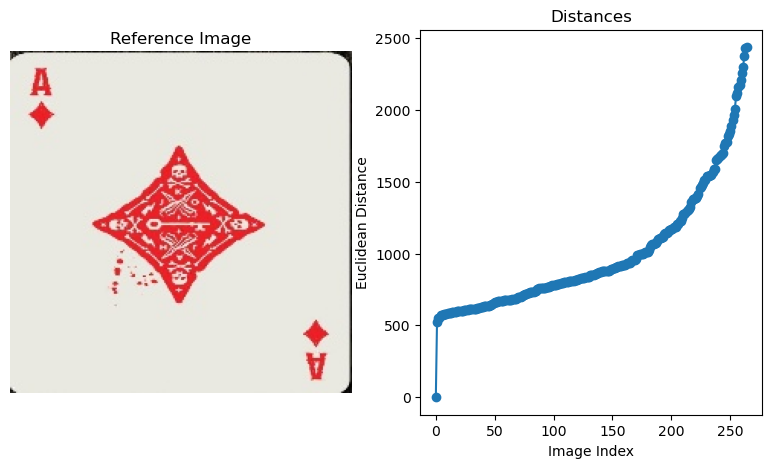

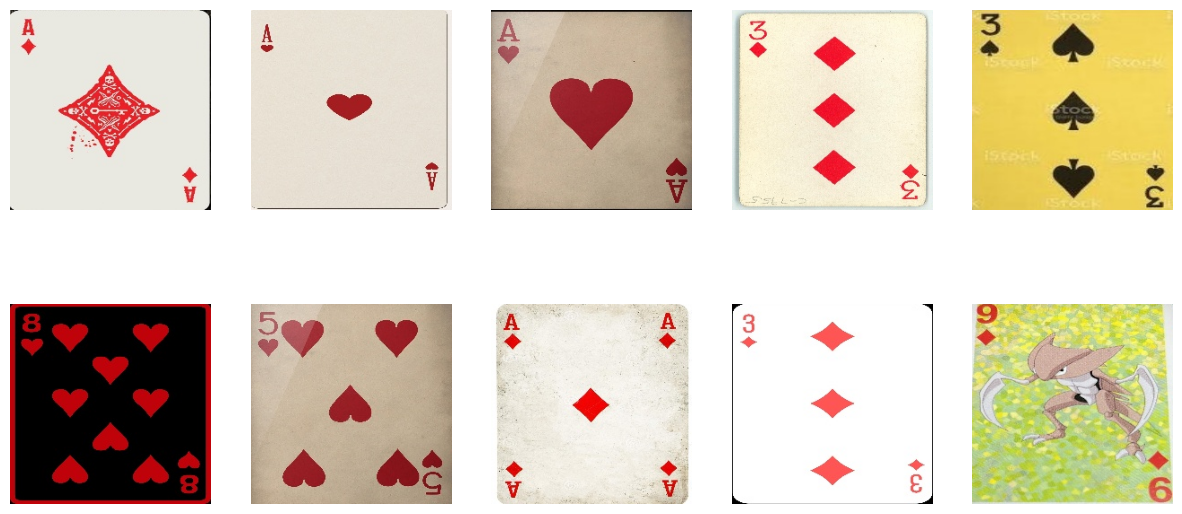

In [10]:
import cv2
import numpy as np
from skimage import feature
import os
import matplotlib.pyplot as plt

def harris_hog_descriptor(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    harris_corners = cv2.dilate(harris_corners, None)

    _, hog_image = feature.hog(gray, orientations=8, pixels_per_cell=(16, 16),
                                cells_per_block=(1, 1), visualize=True, block_norm='L2-Hys')

    return harris_corners, hog_image

def euclidean_distance(descriptor1, descriptor2):
    distance = np.linalg.norm(descriptor1 - descriptor2)
    return distance

def calculate_distances(reference_descriptor, dataset_folder):
    distances = []

    for filename in os.listdir(dataset_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(dataset_folder, filename)
            image = cv2.imread(filepath)
            
            harris, hog = harris_hog_descriptor(image)
            current_descriptor = np.concatenate([harris.flatten(), hog.flatten()])

            distance = euclidean_distance(reference_descriptor, current_descriptor)
            distances.append((filepath, distance))

    distances.sort(key=lambda x: x[1])
    return distances

def plot_most_similar_images(reference_image_path, dataset_folder, num_images=10):
    reference_image = cv2.imread(reference_image_path)
    reference_harris, reference_hog = harris_hog_descriptor(reference_image)
    reference_descriptor = np.concatenate([reference_harris.flatten(), reference_hog.flatten()])

    # Create an empty list to store all distances from different subfolders
    all_distances = []

    # Get a list of all subfolders within the dataset folder
    subfolders = [f.path for f in os.scandir(dataset_folder) if f.is_dir()]

    # Iterate through each subfolder and process the images
    for subfolder in subfolders:
        print(f"\nProcessing images in subfolder: {subfolder}")

        distances = calculate_distances(reference_descriptor, subfolder)
        all_distances.extend(distances)

    # Sort the distances from all subfolders
    all_distances.sort(key=lambda x: x[1])

    # Select the most similar images from all subfolders
    similar_images_paths = [item[0] for item in all_distances[:num_images]]

    # Plot distances
    distances_list = [item[1] for item in all_distances]
    print(distances_list)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB))
    plt.title('Reference Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.plot(distances_list, marker='o')
    plt.title('Distances')
    plt.xlabel('Image Index')
    plt.ylabel('Euclidean Distance')

    # Plot most similar images
    fig, axes = plt.subplots(2, num_images // 2, figsize=(15, 7))

    for i, image_path in enumerate(similar_images_paths):
        image = cv2.imread(image_path)
        axes[i // 5, i % 5].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i // 5, i % 5].axis('off')

    plt.show()

# Example usage:
reference_image_path = 'test/ace of diamonds/3.jpg'
dataset_folder = 'test/'

plot_most_similar_images(reference_image_path, dataset_folder, num_images=10)
